<a href="https://colab.research.google.com/github/elangbijak4/Riset-Bioinformatika/blob/main/RNA_Sequence2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total kombinasi gap: 55
Total alignments generated: 453600
Alignment 1:
Seq1: UC-GUA-
Seq2: UC-A-G


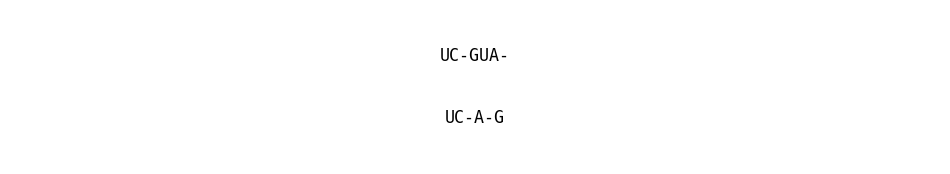

Alignment 2:
Seq1: UC-GUA-
Seq2: AUGC--


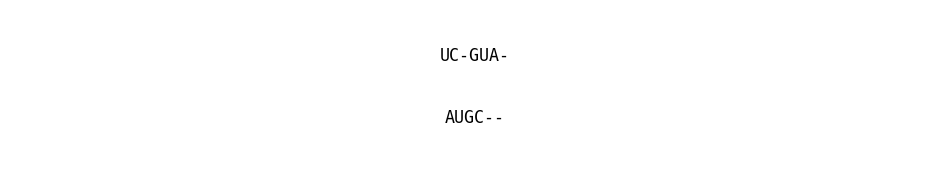

Alignment 3:
Seq1: UC-GUA-
Seq2: CA-U-G


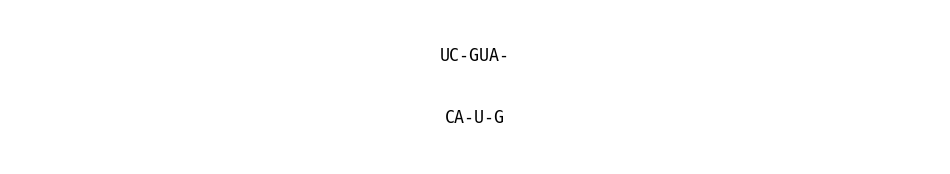

Alignment 4:
Seq1: UC-GUA-
Seq2: GUAC--


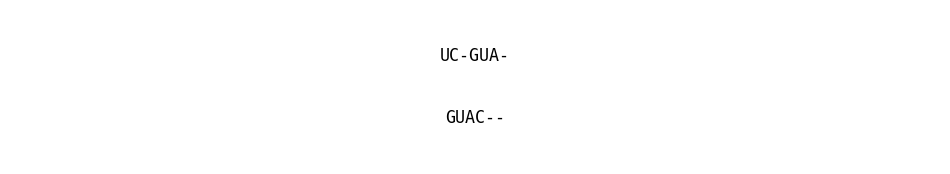

Alignment 5:
Seq1: UC-GUA-
Seq2: -GUAC-


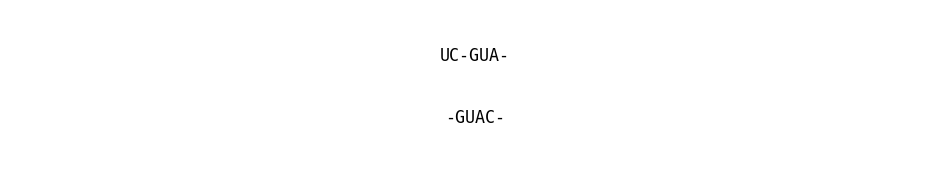


Scoring Alignments:
Alignment 1 score: -4
Alignment 2 score: -9
Alignment 3 score: -8
Alignment 4 score: -9
Alignment 5 score: -9

Conserved Motifs:
[(0, 'U'), (1, 'C'), (2, '-'), (3, 'G'), (4, 'U'), (5, 'A'), (6, '-')]

Evolutionary Distances:

Reconstructing Phylogenetic Tree:


/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2818: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


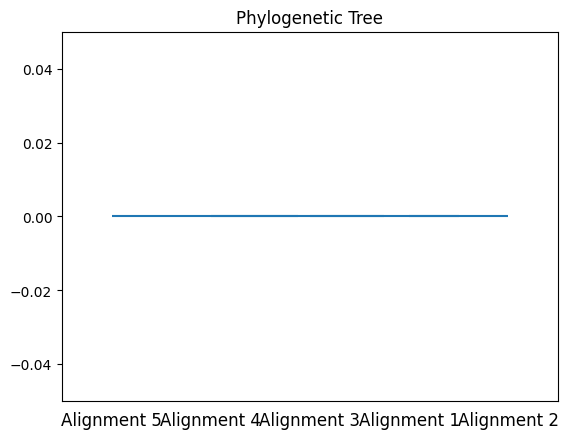

In [2]:
# Import necessary libraries
import math
import itertools
from itertools import product
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

def gap_combinations(seq_lengths, total_gaps):
    alignment_length = sum(seq_lengths) + total_gaps
    total_combinations = math.comb(alignment_length, total_gaps)
    return total_combinations

def generate_combinations(seq1, seq2, total_gaps):
    # Generate all gap positions
    gaps = ['-' for _ in range(total_gaps)]
    seq1_list = list(seq1) + gaps
    seq2_list = list(seq2) + gaps

    # All permutations of gaps in sequences
    seq1_perms = set(itertools.permutations(seq1_list))
    seq2_perms = set(itertools.permutations(seq2_list))

    # Generate all possible alignments
    alignments = list(product(seq1_perms, seq2_perms))

    return alignments

def plot_alignment(alignment):
    seq1, seq2 = alignment
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.text(0.5, 0.7, "".join(seq1), fontsize=12, ha='center', va='center', family='monospace')
    ax.text(0.5, 0.3, "".join(seq2), fontsize=12, ha='center', va='center', family='monospace')
    ax.axis('off')
    plt.show()

def calculate_alignment_score(seq1, seq2, match_score=1, mismatch_penalty=-1, gap_penalty=-2):
    score = 0
    for a, b in zip(seq1, seq2):
        if a == '-' or b == '-':
            score += gap_penalty
        elif a == b:
            score += match_score
        else:
            score += mismatch_penalty
    return score

def identify_conserved_motifs(alignments):
    # Find motifs that are conserved across all alignments
    conserved_positions = []
    for i in range(len(alignments[0][0])):
        column = [alignment[0][i] for alignment in alignments]
        if len(set(column)) == 1:  # All characters in the column are the same
            conserved_positions.append((i, column[0]))
    return conserved_positions

def calculate_evolutionary_distance(seq1, seq2):
    differences = sum(1 for a, b in zip(seq1, seq2) if a != b and a != '-' and b != '-')
    total = sum(1 for a, b in zip(seq1, seq2) if a != '-' and b != '-')
    p = differences / total
    return -3/4 * np.log(1 - 4/3 * p)

def reconstruct_phylogenetic_tree(distances, labels):
    # Convert distances to condensed form
    condensed_distances = squareform(distances)
    linked = linkage(condensed_distances, 'single')
    dendrogram(linked, labels=labels)
    plt.title('Phylogenetic Tree')
    plt.show()

# Example inputs
seq1 = "AUGCU"
seq2 = "AUCG"
total_gaps = 2

# Compute total combinations
seq_lengths = [len(seq1), len(seq2)]
combinations = gap_combinations(seq_lengths, total_gaps)
print(f"Total kombinasi gap: {combinations}")

# Generate and visualize combinations
alignments = generate_combinations(seq1, seq2, total_gaps)
print(f"Total alignments generated: {len(alignments)}")

# Display first 5 alignments
for i, alignment in enumerate(alignments[:5]):
    print(f"Alignment {i + 1}:")
    print("Seq1:", "".join(alignment[0]))
    print("Seq2:", "".join(alignment[1]))
    plot_alignment(alignment)

# Scoring alignments
print("\nScoring Alignments:")
for i, alignment in enumerate(alignments[:5]):
    score = calculate_alignment_score(alignment[0], alignment[1])
    print(f"Alignment {i + 1} score: {score}")

# Identify conserved motifs
conserved_motifs = identify_conserved_motifs(alignments[:5])
print("\nConserved Motifs:")
print(conserved_motifs)

# Evolutionary distances
print("\nEvolutionary Distances:")
num_alignments = len(alignments[:5])
distance_matrix = np.zeros((num_alignments, num_alignments))
labels = []

for i, alignment1 in enumerate(alignments[:5]):
    for j, alignment2 in enumerate(alignments[:5]):
        if i < j:
            distance = calculate_evolutionary_distance(alignment1[0], alignment2[0])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance

# Ensure diagonal is zero
np.fill_diagonal(distance_matrix, 0)

for i in range(num_alignments):
    labels.append(f"Alignment {i + 1}")

# Phylogenetic Tree
print("\nReconstructing Phylogenetic Tree:")
reconstruct_phylogenetic_tree(distance_matrix, labels)